# **Muhammad Zain-ul-abideen | 201002**
# **Qamar Majeed | 200956**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installing modules/libraries
!pip install mlxtend
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing important modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot.metrics as splt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [4]:
# loading and reading dataset
Dataset="/content/drive/MyDrive/dataset.csv"
df=pd.read_csv(Dataset)

In [5]:
# displaying first 5 rows of original dataframe
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# **Randomization**

In [6]:
random_df=df.sample(frac=1)
# "sample" function will randomly samples the specified number of rows.
# frac=1 means all rows or 100% of rows.

In [7]:
# reseting the index of dataframe that has been previously shuffled.
random_df.reset_index(drop=True, inplace=True)
# "reset_index" funcion will resets the index of the dataframe to a sequential numeric index.
# "drop=True" will drop all the old index.
# "inplace=True" will make inchanges in the current dataframe instead of returning new dataframce.

In [8]:
# displaying first 5 rows of randomizied dataframe.
random_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,24,9,386,9683,0,0,0,0,...,255,1.00,0.00,0.07,0.02,0.0,0.0,0.0,0.0,normal
1,0,1,7,1,0,0,0,0,0,0,...,19,0.07,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
2,0,2,12,9,44,44,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
3,0,2,12,9,44,74,0,0,0,0,...,249,0.98,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
4,0,1,54,9,810,330,0,0,0,0,...,195,0.67,0.04,0.01,0.01,0.0,0.0,0.0,0.0,normal


In [9]:
random_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      5
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
random_df['srv_count'].describe()

count    148512.000000
mean         28.252343
std          75.370852
min           0.000000
25%           2.000000
50%           7.000000
75%          17.000000
max         511.000000
Name: srv_count, dtype: float64

<AxesSubplot:>

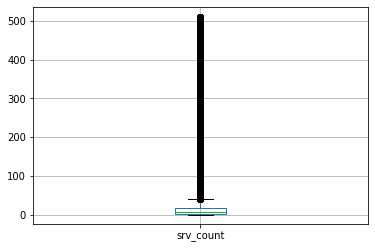

In [11]:
random_df.boxplot(column=['srv_count'])

# **Missing data imputation**

In [12]:
random_df['srv_count'] = random_df['srv_count'].fillna(random_df['srv_count'].median())
random_df['srv_count'].isna().sum()

0

# **Data Encoding**

In [13]:
encoding = pd.get_dummies(random_df[['class']])
encoding

,class_anomaly,class_normal
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
148512,0,1
148513,0,1
148514,0,1
148515,1,0


In [14]:
encoded_df=pd.concat([random_df,encoding],axis=1)

In [15]:
encoded_df.drop(columns=['class','class_normal'],inplace=True)
encoded_df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_anomaly
0,0,1,24,9,386,9683,0,0,0,0,...,255,1.00,0.00,0.07,0.02,0.00,0.00,0.0,0.0,0
1,0,1,7,1,0,0,0,0,0,0,...,19,0.07,0.06,0.00,0.00,0.00,0.00,1.0,1.0,1
2,0,2,12,9,44,44,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0
3,0,2,12,9,44,74,0,0,0,0,...,249,0.98,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0
4,0,1,54,9,810,330,0,0,0,0,...,195,0.67,0.04,0.01,0.01,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,9,1,54,9,1217,328,0,0,0,0,...,127,0.72,0.02,0.01,0.00,0.00,0.00,0.0,0.0,0
148513,0,2,49,9,105,105,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0
148514,0,1,24,9,239,569,0,0,0,0,...,255,1.00,0.00,0.33,0.07,0.00,0.00,0.0,0.0,0
148515,0,1,37,1,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,0.00,0.00,1.0,1.0,1


# **Spliting randomized dataframe into test and train**

In [16]:
X = encoded_df.iloc[:,:-1] # assigning all rows and all columns to 'X' except last column and its rows.
y = encoded_df.iloc[:,-1]  # assigning last/target column and all its rows to 'y'

In [17]:
# spliting data into X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

# **Providing data to Models**

In [18]:
# Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))
acc1 = accuracy_score(y_test ,dt_pred)
pre = precision_score(y_test ,dt_pred,average='weighted',labels=np.unique(dt_pred))
rec = recall_score(y_test ,dt_pred,average='weighted')
f1 = f1_score(y_test ,dt_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('RECALL : ',rec)
print('F1_SCORE : ',f1)

ACCURACY :  0.9942768650686776
PRECISON :  0.994277967691625
RECALL :  0.9942768650686776
F1_SCORE :  0.994276653208319


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

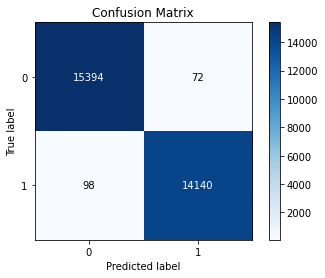

In [19]:
splt.plot_confusion_matrix(y_test, dt_pred)

# **Bagging/ Bootstrap Aggregation**

In [20]:
# Define the base estimator (in this case, a decision tree)
base_estimator = DecisionTreeClassifier()
# Define the bagging classifier
bagging = BaggingClassifier(base_estimator=base_estimator,
                            n_estimators=10,
                            max_samples=0.5,
                            max_features=0.5)
# Train the bagging classifier
bagging.fit(X, y)
# Make predictions using the bagging classifier
predictions = bagging.predict(X)
predictions #This will output an array of predicted labels for each data point in the dataset.
# To compare the predicted labels with the actual labels, you can also print the y variable that contains
# the true labels:

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [21]:
y

0         0
1         1
2         0
3         0
4         0
         ..
148512    0
148513    0
148514    0
148515    1
148516    0
Name: class_anomaly, Length: 148517, dtype: uint8

In [22]:
# Calculate the accuracy of the bagging classifier
accuracy = accuracy_score(y, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9978992303911337


# **Voting / Stacking**

In [23]:
# Combining different kind of models and then applying aggregation.
# Define the base models
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

# Define the stacking classifier
stacking = StackingClassifier(estimators=[('lr', model1), ('knn', model2), ('dt', model3)],
                              final_estimator=LogisticRegression())

# Train the stacking classifier
stacking.fit(X_train, y_train)

# Make predictions using the stacking classifier
predictions = stacking.predict(X_test)

# Calculate the accuracy of the stacking classifier
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy of the stacking classifier
print("Accuracy:", accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 0.9944451925666576


# **Boosting**

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoostClassifier object with a DecisionTreeClassifier base estimator
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# train the AdaBoostClassifier on the training set
ada.fit(X_train, y_train)

# make predictions on the test set
y_pred = ada.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9789590627524912


# **Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# train the Random Forest classifier on the training set
rf.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9047939671424724
